## 1. Exploração de Dados

Exploração dos dados baseado em:

- __281__ observações
- __7__ características 
- __2__ usuários distintos

### Função para mostrar relação entre as características

In [49]:
from sklearn.linear_model import LinearRegression
from data import get_full_data
from matplotlib import pyplot as plt
from sklearn import linear_model
import pandas as pd
import numpy as np

X, Y, df = get_full_data()

#X = df[df['user'] == 2][['rate_blink_left', 'rate_blink_right', 'rate_smile_or_not', 'blink_left', 'blink_right', 'smile_or_not']]
#Y = df[df['user'] == 2]['user']

X = df[['rate_blink_left', 'rate_blink_right', 'rate_smile_or_not', 'blink_left', 'blink_right', 'smile_or_not']]
Y = df['user']

Xdummies_df = pd.get_dummies(X)
Ydummies_df = Y

X = Xdummies_df.values
Y = Ydummies_df.values

#print Y

# Investigar 
# http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-classifier-in-an-svm-supervised-learning-model/
#http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py
# http://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py
def classifier(X, Y):
    from sklearn.decomposition import PCA
    from sklearn import svm
    from sklearn import cross_validation
    import pylab as pl
    import numpy as np
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.20, random_state=111)
    pca = PCA(n_components=2).fit(X_train)
    pca_2d = pca.transform(X_train)
    svmClassifier_2d = svm.LinearSVC(random_state=111).fit(pca_2d, y_train)
    for i in range(0, pca_2d.shape[0]):
        if y_train[i] == 1:
            c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', s=50,marker='+')
        elif y_train[i] == 2:
            c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', s=50,marker='o')
        elif y_train[i] == 3:
            c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', s=50,marker='*')
    pl.legend([c1, c2, c3], ['Alessandro', 'Thiago',   'Jonatha'])
    
    x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
    y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
    Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
    Z = Z.reshape(xx.shape)
    pl.contour(xx, yy, Z)
    
    pl.show()

    

### Relação entre movimentos

Análise dos movimentos como a piscada dos olhos direito e esquerdo e sorriso de uma pessoa

### Relação entre os movimentos dos usuários

Análise das taxas de movimentos do piscar e sorriso de uma pessoa

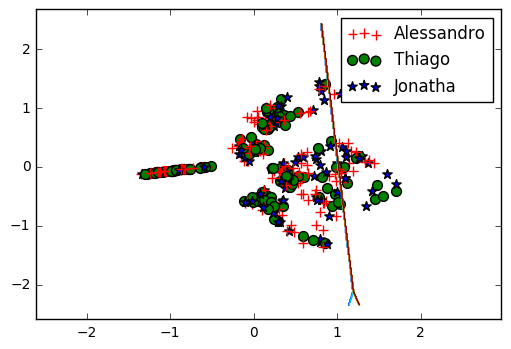

In [51]:
classifier(X, Y)

### Avaliando o modelo

Avaliar a taxa base e a escolha de um algoritmo de predição aplicando treinamento e validação cruzada. 

In [52]:
from predicting_who_is import evaluate

# X and Y
evaluate(X, Y)

Taxa de acerto base: 48.514851
Taxa de acerto do OneVsRest: 0.503411507192
Taxa de acerto do OneVsOne: 0.498340903854
Taxa de acerto do MultinomialNB: 0.480805519897
Taxa de acerto do AdaBoostClassifier: 0.457943533788
Taxa de acerto do SVC: 0.50648267009
Taxa de acerto do LinearSVC: 0.503411507192
Vencedor:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Taxa de acerto do algoritmo vencedor entre os algoritmos no mundo real : 50.495049505 
Total de elementos : 502
